# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [29]:
# Import your libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import norm

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [44]:
# Your code here
mu, sigma = 50, 5
sample_size = pd.Series([10, 50, 500, 5000, 50000])
dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))
tests = dists.apply(lambda d: stats.normaltest(d))
tests

C:\Users\broth\anaconda3\envs\kittycat\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


0     (1.1230182175596117, 0.5703476973468053)
1      (1.938332393329529, 0.3793992506161045)
2     (1.1017889068338271, 0.5764339863758665)
3    (0.08960422125426759, 0.9561866822950045)
4     (3.393708285024201, 0.18325912528982355)
dtype: object

#### Interpret the normaltest results and make your observations.

In [31]:
# Explain the test results here


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

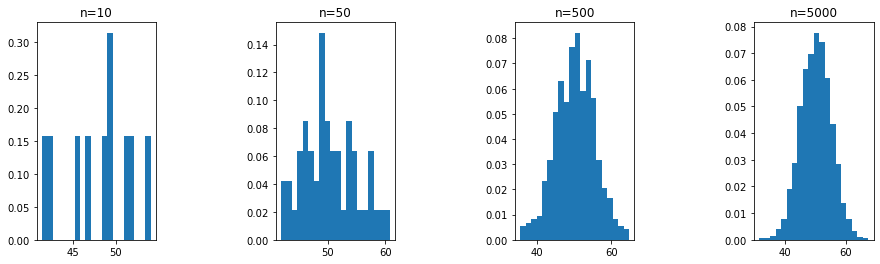

In [32]:
# Your code here
f, ax = plt.subplots(1, 4)
f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [33]:
# Your comment and explanation here
"""
The higher the sample, the higher concentration of observations in the mean of the sample.
The Central Limit Theorem states that the more samples we draw the closer the distribution gets to a normal distribution
"""

'\nThe higher the sample, the higher concentration of observations in the mean of the sample.\nThe Central Limit Theorem states that the more samples we draw the closer the distribution gets to a normal distribution\n'

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

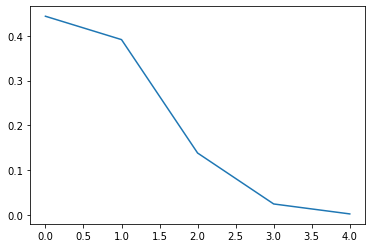

In [34]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15
x = range(n)
dist = binom(n, p)

fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()

#### Explain what you observe from the plot above

In [35]:
# Your comment here
"""
The probability starts going down when the number of people increase.
"""

'\nThe probability starts going down when the number of people increase.\n'

#### Now plot PMF with 50, 500, and 5000 visitors.

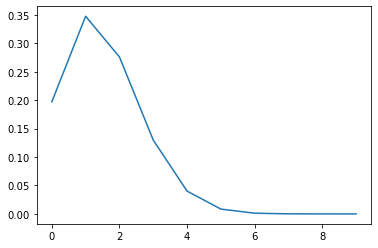

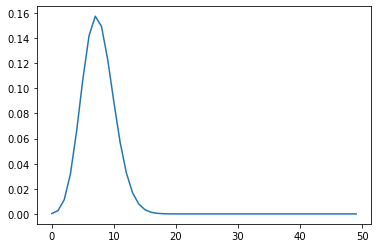

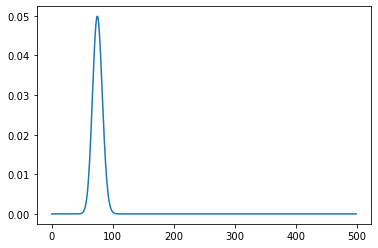

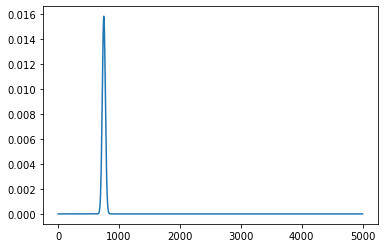

In [36]:
# your code here
n_sizes = [10,50,500,5000]
for n in n_sizes:
    dist = scipy.stats.binom(n, 0.15)
    fig, ax = plt.subplots(1, 1)
    plt.plot(range(n), dist.pmf(range(n)))
    plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [37]:
# Your comment here
"""
The spike is more noticable depending on the size sample. 
The bigger the sample the more narrow it is. Which means that the probability also goes down.
"""

'\nThe spike is more noticable depending on the size sample. \nThe bigger the sample the more narrow it is. Which means that the probability also goes down.\n'

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [38]:
# Your comment here
"""
The Poisson distribution is used on independent events but that happen of a constant period of time but never at the same time.
It can be really usefull to describe an event that occurs once every day over a period of n amount of days

"""

'\nThe Poisson distribution is used on independent events but that happen of a constant period of time but never at the same time.\nIt can be really usefull to describe an event that occurs once every day over a period of n amount of days\n\n'

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [39]:
# your code here
scipy.stats.poisson.pmf(320, 300)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [40]:
# your code here
scipy.stats.poisson.pmf(60, 300)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

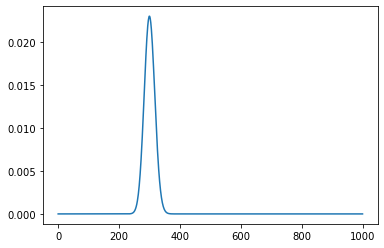

In [41]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)
rv = poisson(300)
arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)
plt.show()

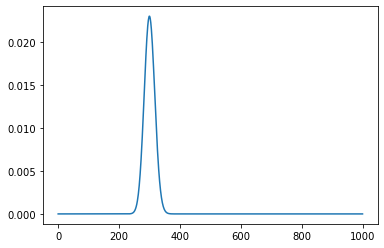

In [42]:
# or
arr = [scipy.stats.poisson.pmf(i, 300) for i in range(1000)]
plt.plot(arr)
plt.show()